<a href="https://colab.research.google.com/github/Ciiku-Kihara/PCA-ANOMALY-DETECTION-AND-ASSOCIATION-ANALYSIS-WITH-R/blob/main/Association_Analysis_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Analysis with R




## a) Defining the analysis question

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax).

I am expected to find out the associations between products

## b) Defining the metric for success

Be able to effectively identify associations between the different products

## c) Understanding the context

Carrefour was launched in the region in 1995 by UAE-based Majid Al Futtaim, which is the exclusive franchisee to operate Carrefour in over 30 countries across the Middle East, Africa, and Asia, and fully owns the operations in the region. Today, Majid Al Futtaim operates over 320 Carrefour stores in 16 countries, serving more than 750,000 customers daily and employing over 37,000 colleagues.

Carrefour operates different store formats, as well as multiple online offerings to meet the growing needs of its diversified customer base. In line with the brand’s commitment to provide the widest range of quality products and value for money, Carrefour offers an unrivalled choice of more than 500,000 food and non-food products, and a locally inspired exemplary customer experience to create great moments for everyone every day.

## d) Recording the experimental design

- Problem Definition
- Association Analysis
- Provide insights based on my analysis
- Provide recommendations


## e) Data Relevance

The dataset adequate to do association analysis

# 2. Installing and importing relevant libraries

In [1]:
# Installing the necessary packages

install.packages(c("arules", "tidyverse"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Loading the libraries

library(arules)
library(tidyverse)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks arules::recode()
✖ tidyr::unpack() masks Matrix::unpack()



# 3. Loading and checking the data

In [3]:
# Reading the dataset

Transactions<-read.transactions("Association.csv", sep = ",", rm.duplicates = TRUE)
Transactions

distribution of transactions with duplicates:
1 
5 


transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [4]:
# Verifying the object's class

class(Transactions)

[1] "transactions"
attr(,"package")
[1] "arules"

In [5]:
# Previewing our first 5 transactions

inspect(Transactions[1:5])


    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 


In [6]:
# Getting a summary of the transactions

summary(Transactions)

# The transactions dataset has 7501 rows and 119 columns
# The most frequent item is mineral water.
# The longest itemset has 20 items. 
# Majority of the transactions have 1 item or element.

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

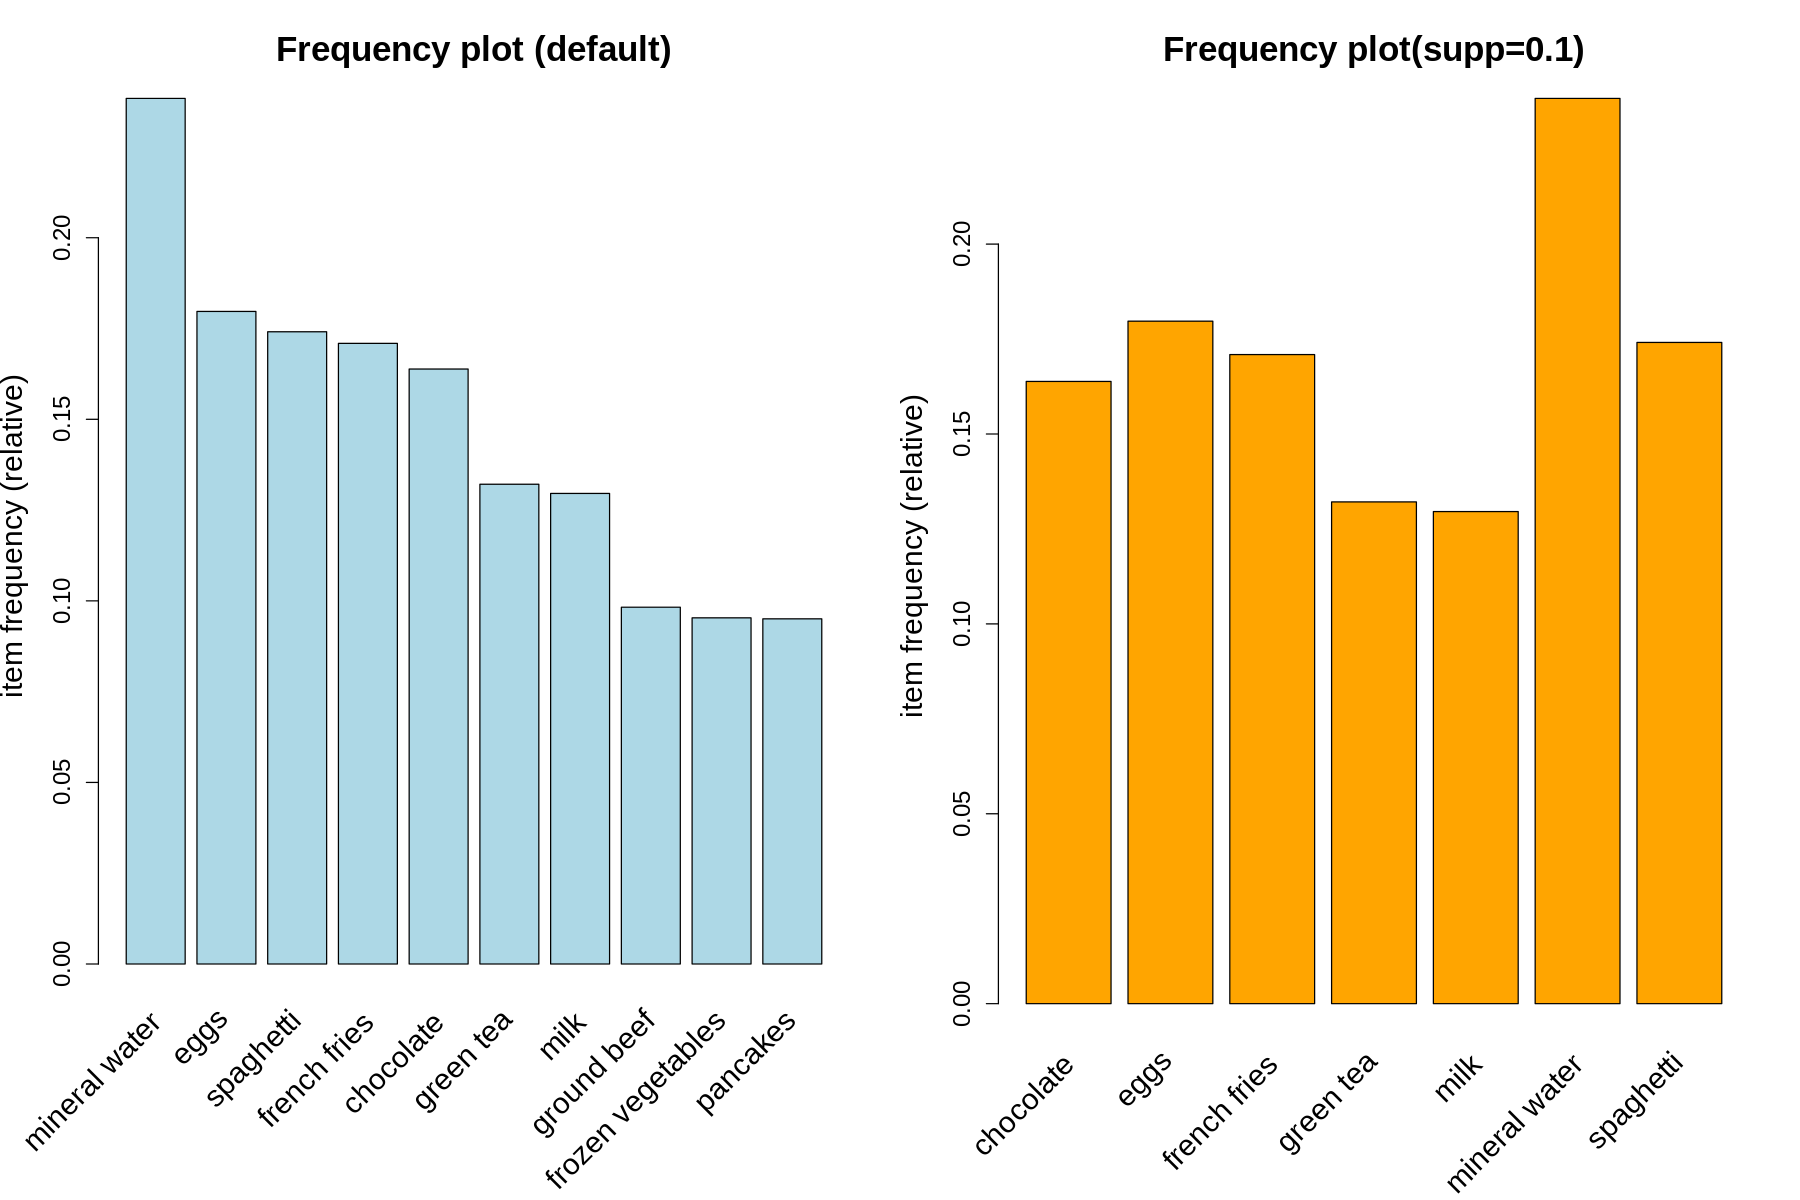

In [35]:
# Plotting the most frequent items both with and without setting the support lower limit

options(repr.plot.width = 15, repr.plot.height = 10)
par(mfrow = c(1, 2))
itemFrequencyPlot(Transactions, topN = 10,col="lightblue", main = "Frequency plot (default)", cex = 1.5, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)
itemFrequencyPlot(Transactions, support = 0.1,col="orange", main = "Frequency plot(supp=0.1)", cex = 1.5, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)

In [15]:
# Building a model based on association rules using the apriori function
# supp = 0.001, conf = 0.8

rules <- apriori (Transactions, parameter = list(supp = 0.001, conf = 0.8))
rules

# We get a set of 74 rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [16]:
# Building a model based on association rules using the apriori function
# supp = 0.002, conf = 0.8

rules1 <- apriori (Transactions, parameter = list(supp = 0.002, conf = 0.8))
rules1

# We get a set of only 2 rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 2 rules 

In [17]:
# Building a model based on association rules using the apriori function
# supp = 0.001, conf = 0.6

rules2 <- apriori (Transactions, parameter = list(supp = 0.001, conf = 0.6))
rules2

# We get a set of 545 rules which are way to many rules to work with.
# So I will use the model that gave 74 rules(rules).

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [545 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 545 rules 

In [18]:
# Observing rules built in our model i.e. first 10 model rules

inspect(rules[1:10])

     lhs                             rhs             support     confidence
[1]  {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2]  {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3]  {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4]  {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5]  {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
[6]  {milk,pasta}                 => {shrimp}        0.001599787 0.8571429 
[7]  {cooking oil,fromage blanc}  => {mineral water} 0.001199840 0.8181818 
[8]  {black tea,salmon}           => {mineral water} 0.001066524 0.8000000 
[9]  {black tea,frozen smoothie}  => {milk}          0.001199840 0.8181818 
[10] {red wine,tomato sauce}      => {chocolate}     0.001066524 0.8000000 
     coverage    lift      count
[1]  0.001199840  3.729058  8   
[2]  0.002133049  4.666587 13   
[3]  0.001466471  3.432428  9   
[4]  0.001866418  3.595877 12   

In [19]:
# Inspecting the first 5 rules with the highest lift

inspect(head(rules, n = 5, by = "lift"))

    lhs                       rhs                     support confidence    coverage      lift count
[1] {eggs,                                                                                          
     mineral water,                                                                                 
     pasta}                => {shrimp}            0.001333156  0.9090909 0.001466471 12.722185    10
[2] {french fries,                                                                                  
     mushroom cream sauce,                                                                          
     pasta}                => {escalope}          0.001066524  1.0000000 0.001066524 12.606723     8
[3] {milk,                                                                                          
     pasta}                => {shrimp}            0.001599787  0.8571429 0.001866418 11.995203    12
[4] {mushroom cream sauce,                                                                 

In [20]:
# Inspecting the first 5 rules with the highest confidence

inspect(head(rules, n = 5, by = "confidence"))

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


In [14]:
# Looking at the least popular transactions

itm <- itemFrequency(Transactions, type = "relative")
head(sort(itm), n = 10)

water spray         napkins           cream         bramble             tea 
   0.0003999467    0.0006665778    0.0009332089    0.0018664178    0.0038661512 
        chutney   mashed potato chocolate bread    dessert wine         ketchup 
   0.0041327823    0.0041327823    0.0042660979    0.0043994134    0.0043994134

In [23]:
# We may want to make a promotion to increase the sale of Tea
# Let us look at what people buy after buying tea

tea = subset(rules, subset = lhs %pin% "tea")

# Then order by confidence
tea = sort(tea, by="confidence", decreasing=TRUE)
inspect(tea[1:5])


    lhs                                     rhs             support    
[1] {black tea,spaghetti,turkey}         => {eggs}          0.001066524
[2] {green tea,ground beef,tomato sauce} => {spaghetti}     0.001333156
[3] {black tea,frozen smoothie}          => {milk}          0.001199840
[4] {black tea,salmon}                   => {mineral water} 0.001066524
[5] {cookies,green tea,milk}             => {french fries}  0.001066524
    confidence coverage    lift     count
[1] 0.8888889  0.001199840 4.946258  8   
[2] 0.8333333  0.001599787 4.786243 10   
[3] 0.8181818  0.001466471 6.313973  9   
[4] 0.8000000  0.001333156 3.356152  8   
[5] 0.8000000  0.001333156 4.680811  8   


In [34]:
# We may want to make a promotion to increase the sale of ground beef
# Let us look at what people buy after buying ground beef

beef = subset(rules, subset = lhs %pin% "ground beef")
beef

# Then order by confidence
beef = sort(beef, by="confidence", decreasing=TRUE)
inspect(beef[1:5])

set of 12 rules 

    lhs                   rhs                     support confidence    coverage     lift count
[1] {ground beef,                                                                              
     light cream,                                                                              
     olive oil}        => {mineral water}     0.001199840  1.0000000 0.001199840 4.195190     9
[2] {ground beef,                                                                              
     pancakes,                                                                                 
     whole wheat rice} => {mineral water}     0.001333156  0.9090909 0.001466471 3.813809    10
[3] {brownies,                                                                                 
     eggs,                                                                                     
     ground beef}      => {mineral water}     0.001066524  0.8888889 0.001199840 3.729058     8
[4] {ground beef,                       

# 4. Insights

The insights that can be made from the analysis are as follows:

- The three most frequently bought items are mineral water, eggs and spaghetti.

- The 3 least frequently bought items are water spray, napkins and cream. Tea is also among the least frequently purchased items.

- Ground beef, frozen vegetabls and pancakes fell off the most frequently bought items list after support was set to 0.1.

# 5. Recommendations

In light of the above insights, the following recommendations can be made:

- To increase the sale of tea, there could be a promotion where tea is sold with milk, eggs or cookies.

- To increase the sale of ground beef, an offer can be given where ground beef us sold with say, a free bottle of mineral water.

